In [8]:
%pylab inline
from __future__ import division
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import cPickle as pickle
dt = 1/20000 #20kHz sampling rate


Populating the interactive namespace from numpy and matplotlib


In [ ]:
dates = pickle.load( open( "dates.pkl", "rb" ))
LNdata = pickle.load(open('LNdata.pkl','rb'))
pulse_labels = pickle.load(open('pulselabelsLN.pkl','rb'))


In [ ]:
def local_maxima(d):
    '''
    returns bool array with the same shape as `d` with elemets at the position of local maxima in `d` are set to `True`
    this function simply checks if the neighbouring elements are smaller or equal and is __sensitive to noise__
    '''
    return r_[True, d[1:] >= d[:-1]] & r_[d[:-1] > d[1:], True]


In [122]:
stim_start = 1 #seconds
stim_end   = 5 #seconds

idx_stim_start = int(stim_start/dt)
idx_stim_end =   int(stim_end/dt)

voltage = np.array(V[idx_stim_start:idx_stim_end])
tsim =  arange(stim_start,stim_end,dt)

th = 0 # use threshold of 0 mV for AP detection. the AP waveform is not very noise so the below works

number_of_datasets = 8

Firing_Rates = [[] for x in xrange(number_of_datasets)]

for dataset in range(number_of_datasets):
    number_of_pulses = len(pulse_labels[dataset])
    for i in range(number_of_pulses):

        V = LNdata[dataset][i]
        V_maxima = (local_maxima(V) & (V>th))
        indices = V_maxima.nonzero()[0]
        Firing_Rates[dataset].append(int(len(indices))/(stim_end-stim_start))    

for rates in range(len(Firing_Rates)):
    print len(Firing_Rates[rates])

    


11
15
18
20
8
12
9
10


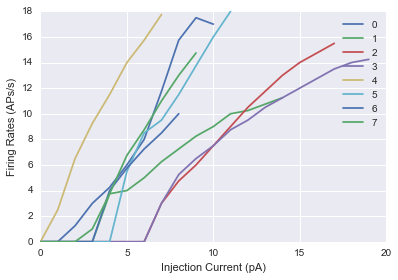

In [123]:
fig = figure()

ax = fig.add_axes([0.1,0.1,0.8,0.8])
ax.set_ylabel('Firing Rates (APs/s)')
ax.set_xlabel('Injection Current (pA)')


for dset in range(number_of_datasets):
    ax.plot(Firing_Rates[dset],label = dset)

ax.legend()
show()

